# Getting started with `cogsworth`

## Basic imports


In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

Here are some plotting settings as well to make sure everything looks good.

In [2]:
# ensure jupyter actually uses your fancy retina display
%config InlineBackend.figure_format = 'retina'

# make pandas show *every* column
pd.set_option("display.max_columns", None)

# various adjustments to matplotlib settings
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

Create your first population
============================

The central class in this package is `cogsworth.pop.Population`. The class gives you access to the functionality of the entire package with one convenient interface. Let's start by creating a small population of binaries with the default settings.

In [3]:
import cogsworth
p = cogsworth.pop.Population(2000, processes=6)
p

<Population - 2000 systems - galactic_potential=MilkyWayPotential, SFH=Wagg2022>


Though this class is initialised, we still need to actually create the population to find its present day state. We do this by running:

In [4]:
p.create_population()

Run for 2000 binaries
Ended up with 2035 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[1.2s] Evolve binaries (run COSMIC)


2044it [00:10, 187.72it/s]                          


[14.7s] Get orbits (run gala)
Overall: 16.0s


This function has just

* Sampled the initial binaries from :mod:`cosmic`
* Drawn their initial kinematics and birth times from the Galaxy model
* Evolved the binaries from birth until present day using :mod:`cosmic`
* Integrated the orbits of the binaries through the galaxy using :mod:`gala`

Inspect population
==================

Full evolution
--------------
``p`` now contains information about the stellar evolution of each constituent star of each binary, as well as the path of the binary through the galaxy. Let's investigate some of those things.


### Stellar Evolution

First we can take a look at the `cosmic` ``bpp`` evolution table and see how the stars evolved over time.

In [5]:
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.231143,0.222011,0.0,0.0,12.524566,7.631207,0.386790,0.085773,0.085031,1.0,0.000000,0.000000,6.670674e+05,7.233149e+05,0.0,0.0,0.251918,0.245181,0.231143,0.222011,0.008112,0.007462,3466.731238,3441.394546,0.0,0.0,0.231143,0.222011,0.251918,0.245181,0.025212,0.018893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,8939.348253,0.231143,0.222011,0.0,0.0,12.523718,7.630432,0.386758,0.086012,0.085249,10.0,8939.348253,8939.348253,6.670674e+05,7.233149e+05,0.0,0.0,0.252615,0.245806,0.231143,0.222011,0.008148,0.007492,3465.755631,3440.498997,0.0,0.0,0.231143,0.222011,0.252615,0.245806,6.293984,6.346489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.133206,0.126375,0.0,0.0,34.174945,45.446227,0.009900,0.012913,0.012639,1.0,0.000000,0.000000,2.005160e+06,2.227734e+06,0.0,0.0,0.167555,0.160110,0.133206,0.126375,0.002225,0.001925,3076.229879,3034.872845,0.0,0.0,0.066603,0.063187,0.108911,0.104072,0.000506,0.000351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,9170.063571,0.133206,0.126375,0.0,0.0,34.174943,45.446224,0.009900,0.012925,0.012650,10.0,9170.063571,9170.063571,2.005160e+06,2.227734e+06,0.0,0.0,0.167714,0.160247,0.133206,0.126375,0.002228,0.001927,3075.931406,3034.608898,0.0,0.0,0.066603,0.063187,0.109014,0.104160,0.002095,0.001842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.170130,0.107157,0.0,0.0,4.933709,2.411945,0.303497,0.144635,0.121911,1.0,0.000000,0.000000,1.294580e+06,3.262645e+06,0.0,0.0,0.208490,0.142303,0.170130,0.107157,0.003717,0.001212,3135.186017,2867.818559,0.0,0.0,0.085065,0.053579,0.135518,0.092497,0.002764,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,7863.345751,0.427490,0.124741,0.0,0.0,12.714044,7.070294,0.001108,0.064512,0.045945,10.0,7863.345751,7863.345751,1.943673e+05,2.394406e+06,0.0,0.0,0.399676,0.162774,0.427490,0.124741,0.025626,0.001773,3669.322023,2949.029357,0.0,0.0,0.223800,0.062370,0.202460,0.105803,2.939674,0.788565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2032
2033,0.000000,0.322266,0.194534,0.0,0.0,4.338169,1.456702,0.003010,0.173328,0.155368,1.0,0.000000,0.000000,3.484214e+05,9.659667e+05,0.0,0.0,0.317298,0.225899,0.322266,0.194534,0.014931,0.005324,3598.002429,3295.200200,0.0,0.0,0.322266,0.097267,0.317298,0.146834,0.270103,0.007288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2033
2033,3205.505908,0.322266,0.194534,0.0,0.0,4.334814,1.455013,0.003003,0.173771,0.155588,10.0,3205.505908,3205.505908,3.484214e+05,9.659667e+05,0.0,0.0,0.317865,0.226044,0.322266,0.194534,0.014978,0.005330,3597.564178,3295.046341,0.0,0.0,0.322266,0.097267,0.317865,0.146929,55.176745,71.745301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2033
2034,0.000000,0.191418,0.185784,0.0,0.0,183.499029,469.068069,0.262321,0.004162,0.004123,1.0,0.000000,0.000000,8.277292e+05,8.788062e+05,0.0,0.0,0.214932,0.210045,0.191418,0.185784,0.006676,0.006264,3574.702556,3559.047929,0.0,0.0,0.095709,0.092892,0.139706,0.136529,0.006750,0.005466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2034


There are of course **many** things that you can do with this table! But let's say, maybe you want get any binaries that experience mass transfer

In [6]:
# get any binaries that have an evol_type indicating Roche Lobe overflow started
mt_bin_nums = p.bpp[p.bpp["evol_type"] == 3.0]["bin_num"].unique()

Let's take a look at the evolution of the first binary in this list

In [7]:
p.bpp[p.bpp["bin_num"] == mt_bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
13,0.000000,5.724451,1.204363,1.0,1.0,380.589984,326.910411,0.583413,0.032544,0.028390,1.0,0.000000,0.000000,7.562436e+01,4949.129539,0.000000,0.000000,2.664437,1.149108,5.724451,1.204363,894.645859,2.069768,19425.833085,6487.384734,0.000000,0.000000,1.000000e-10,7.584608e-03,1.000000e-10,0.198791,4.755414e+03,1937.513246,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,13
13,75.752066,5.712339,1.204363,2.0,1.0,381.256398,328.056267,0.583413,0.075673,0.028430,2.0,75.975374,75.752061,7.597537e+01,4949.129092,1.010229,0.000000,6.204205,1.153391,5.712339,1.204363,2549.259526,2.091781,16539.792779,6492.475486,0.206210,0.000000,1.000000e-10,7.584674e-03,1.000000e-10,0.199536,1.047136e+03,1923.154251,0.0,0.0,0.0,0.0,0.0,0.0,-0.223308,0.000005,0.0,0.0,13
13,76.045309,5.711900,1.204364,3.0,1.0,363.864338,305.876152,0.562221,0.718676,0.028346,2.0,76.281439,76.045026,7.598815e+01,4949.111024,1.030414,0.000000,59.094044,1.153410,5.711900,1.204364,1605.937261,2.091877,4774.522021,6492.498409,0.209321,0.000000,2.340858e+00,7.584501e-03,3.827609e+01,0.199538,1.135108e+01,1923.387891,0.0,0.0,0.0,0.0,0.0,0.0,-0.236130,0.000283,0.0,0.0,13
13,76.143714,5.711230,1.204374,3.0,1.0,206.659965,130.930741,0.000000,1.000992,0.021849,3.0,76.379844,76.141261,7.598815e+01,4948.969874,1.032182,0.000000,106.780974,1.153428,5.711900,1.204374,3780.615321,2.091985,4399.601025,6492.530838,0.209592,0.000000,4.466069e+00,7.583141e-03,1.031758e+02,0.199532,1.752736e+01,17.527363,0.0,0.0,0.0,0.0,0.0,0.0,-0.236130,0.002453,0.0,0.0,13
13,76.143714,5.711230,1.204374,3.0,1.0,206.659965,130.930741,0.000000,1.000992,0.021849,7.0,76.379844,76.141261,7.598815e+01,4948.969874,1.032182,0.000000,106.780974,1.153428,5.711900,1.204374,3780.615321,2.091985,4399.601025,6492.530838,0.209592,0.000000,4.466069e+00,7.583141e-03,1.031758e+02,0.199532,1.752736e+01,17.527363,0.0,0.0,0.0,0.0,0.0,0.0,-0.236130,0.002453,0.0,0.0,13
13,76.143714,1.032182,1.204374,7.0,1.0,3.241590,0.452292,0.000000,1.000992,0.021849,8.0,0.000000,76.141261,7.598815e+01,4948.969874,0.000000,0.000000,106.780974,1.153428,1.032182,1.204374,3780.615321,2.091985,4399.601025,6492.530838,0.209592,0.000000,4.466069e+00,7.583141e-03,1.031758e+02,0.199532,1.752736e+01,17.527363,0.0,0.0,0.0,0.0,0.0,0.0,-0.236130,0.002453,0.0,0.0,13
13,76.143714,1.032182,1.204374,7.0,1.0,3.241590,0.452292,0.000000,0.176831,0.906906,4.0,0.000000,76.141261,1.953790e+01,4948.969874,0.000000,0.000000,0.209592,1.153428,1.032182,1.204374,275.867141,2.091985,51612.778335,6492.530838,0.000000,0.000000,1.032182e+00,7.583141e-03,2.095920e-01,0.199532,1.752736e+01,17.527363,0.0,0.0,0.0,0.0,0.0,0.0,76.143714,0.002453,0.0,0.0,13
13,95.878264,1.021428,1.204865,8.0,1.0,3.110126,0.426038,0.000000,0.183320,0.944381,2.0,20.032161,95.752797,2.003215e+01,4942.061369,0.434019,0.000000,0.207940,1.155174,1.021428,1.204865,590.109570,2.101670,62666.248150,6495.116810,0.076606,0.000000,1.000000e-10,7.516550e-03,1.000000e-10,0.199377,1.933817e+01,5389.922155,0.0,0.0,0.0,0.0,0.0,0.0,75.846103,0.125467,0.0,0.0,13
13,97.794356,1.012025,1.205831,8.0,1.0,3.116578,0.428176,0.000000,1.000635,0.941415,3.0,21.948253,97.401574,2.003215e+01,4928.497086,0.679612,0.000000,1.134702,1.156516,1.021428,1.205831,5555.136758,2.109962,46989.668021,6497.742385,0.058738,0.000000,1.000000e-10,7.385240e-03,1.000000e-10,0.198692,5.359642e+03,5359.642215,0.0,0.0,0.0,0.0,0.0,0.0,75.846103,0.392782,0.0,0.0,13
13,97.958235,0.785521,1.299909,8.0,1.0,3.554074,0.537730,0.000000,0.404051,0.841643,4.0,22.112132,72.940131,2.003215e+01,3827.603989,0.781693,0.000000,0.482872,1.265778,1.021428,1.299909,10011.618412,2.965193,83460.278361,6762.450034,0.052615,0.000000,1.000000e-10,3.171937e-08,1.

We can also put this to use. Let's see how the initial orbital periods are different for binaries that experience mass transfer.

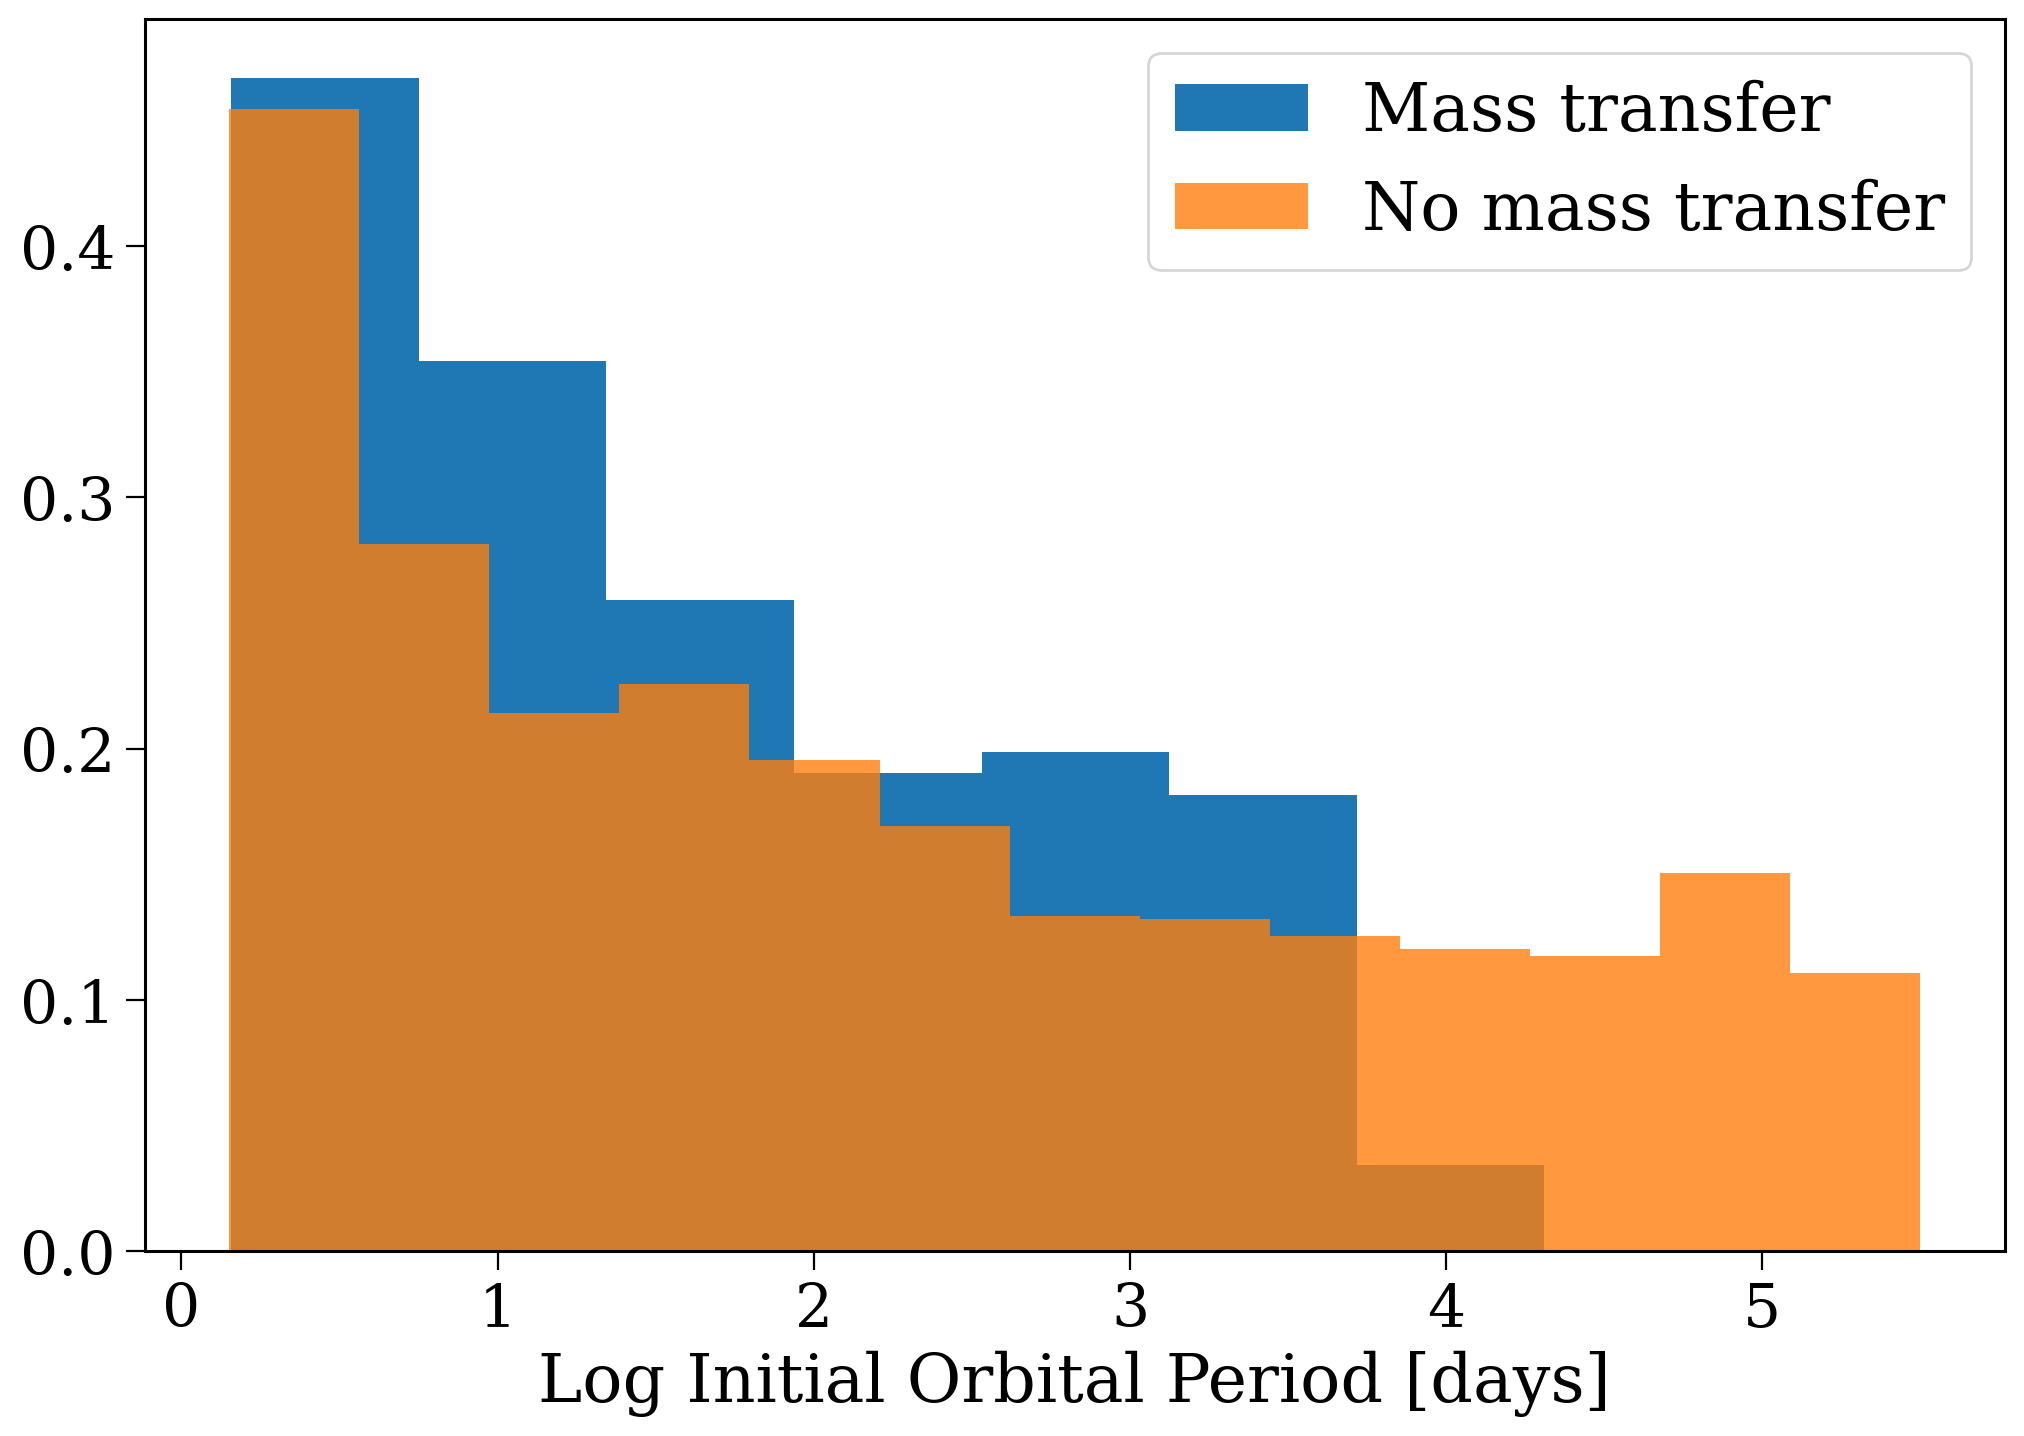

In [8]:
experienced_mt = p.initC["bin_num"].isin(mt_bin_nums)
plt.hist(np.log10(p.initC["porb"][experienced_mt]), bins="fd", density=True, label="Mass transfer")
plt.hist(np.log10(p.initC["porb"][~experienced_mt]), bins="fd", density=True, label="No mass transfer", alpha=0.8)
plt.legend()
plt.xlabel("Log Initial Orbital Period [days]");

As we can see in the plot above, systems that experience mass transfer are biased towards shorter orbital periods. This is expected as these systems are closer and therefore it is easier to initiate mass transfer.

### Orbits

We also have access to the full orbit of each binary in the population in ``p.orbits``. I'm going to cheat and pick a fairly simple one to show from this random population (a binary that didn't disrupt and is pretty close to us at present day).

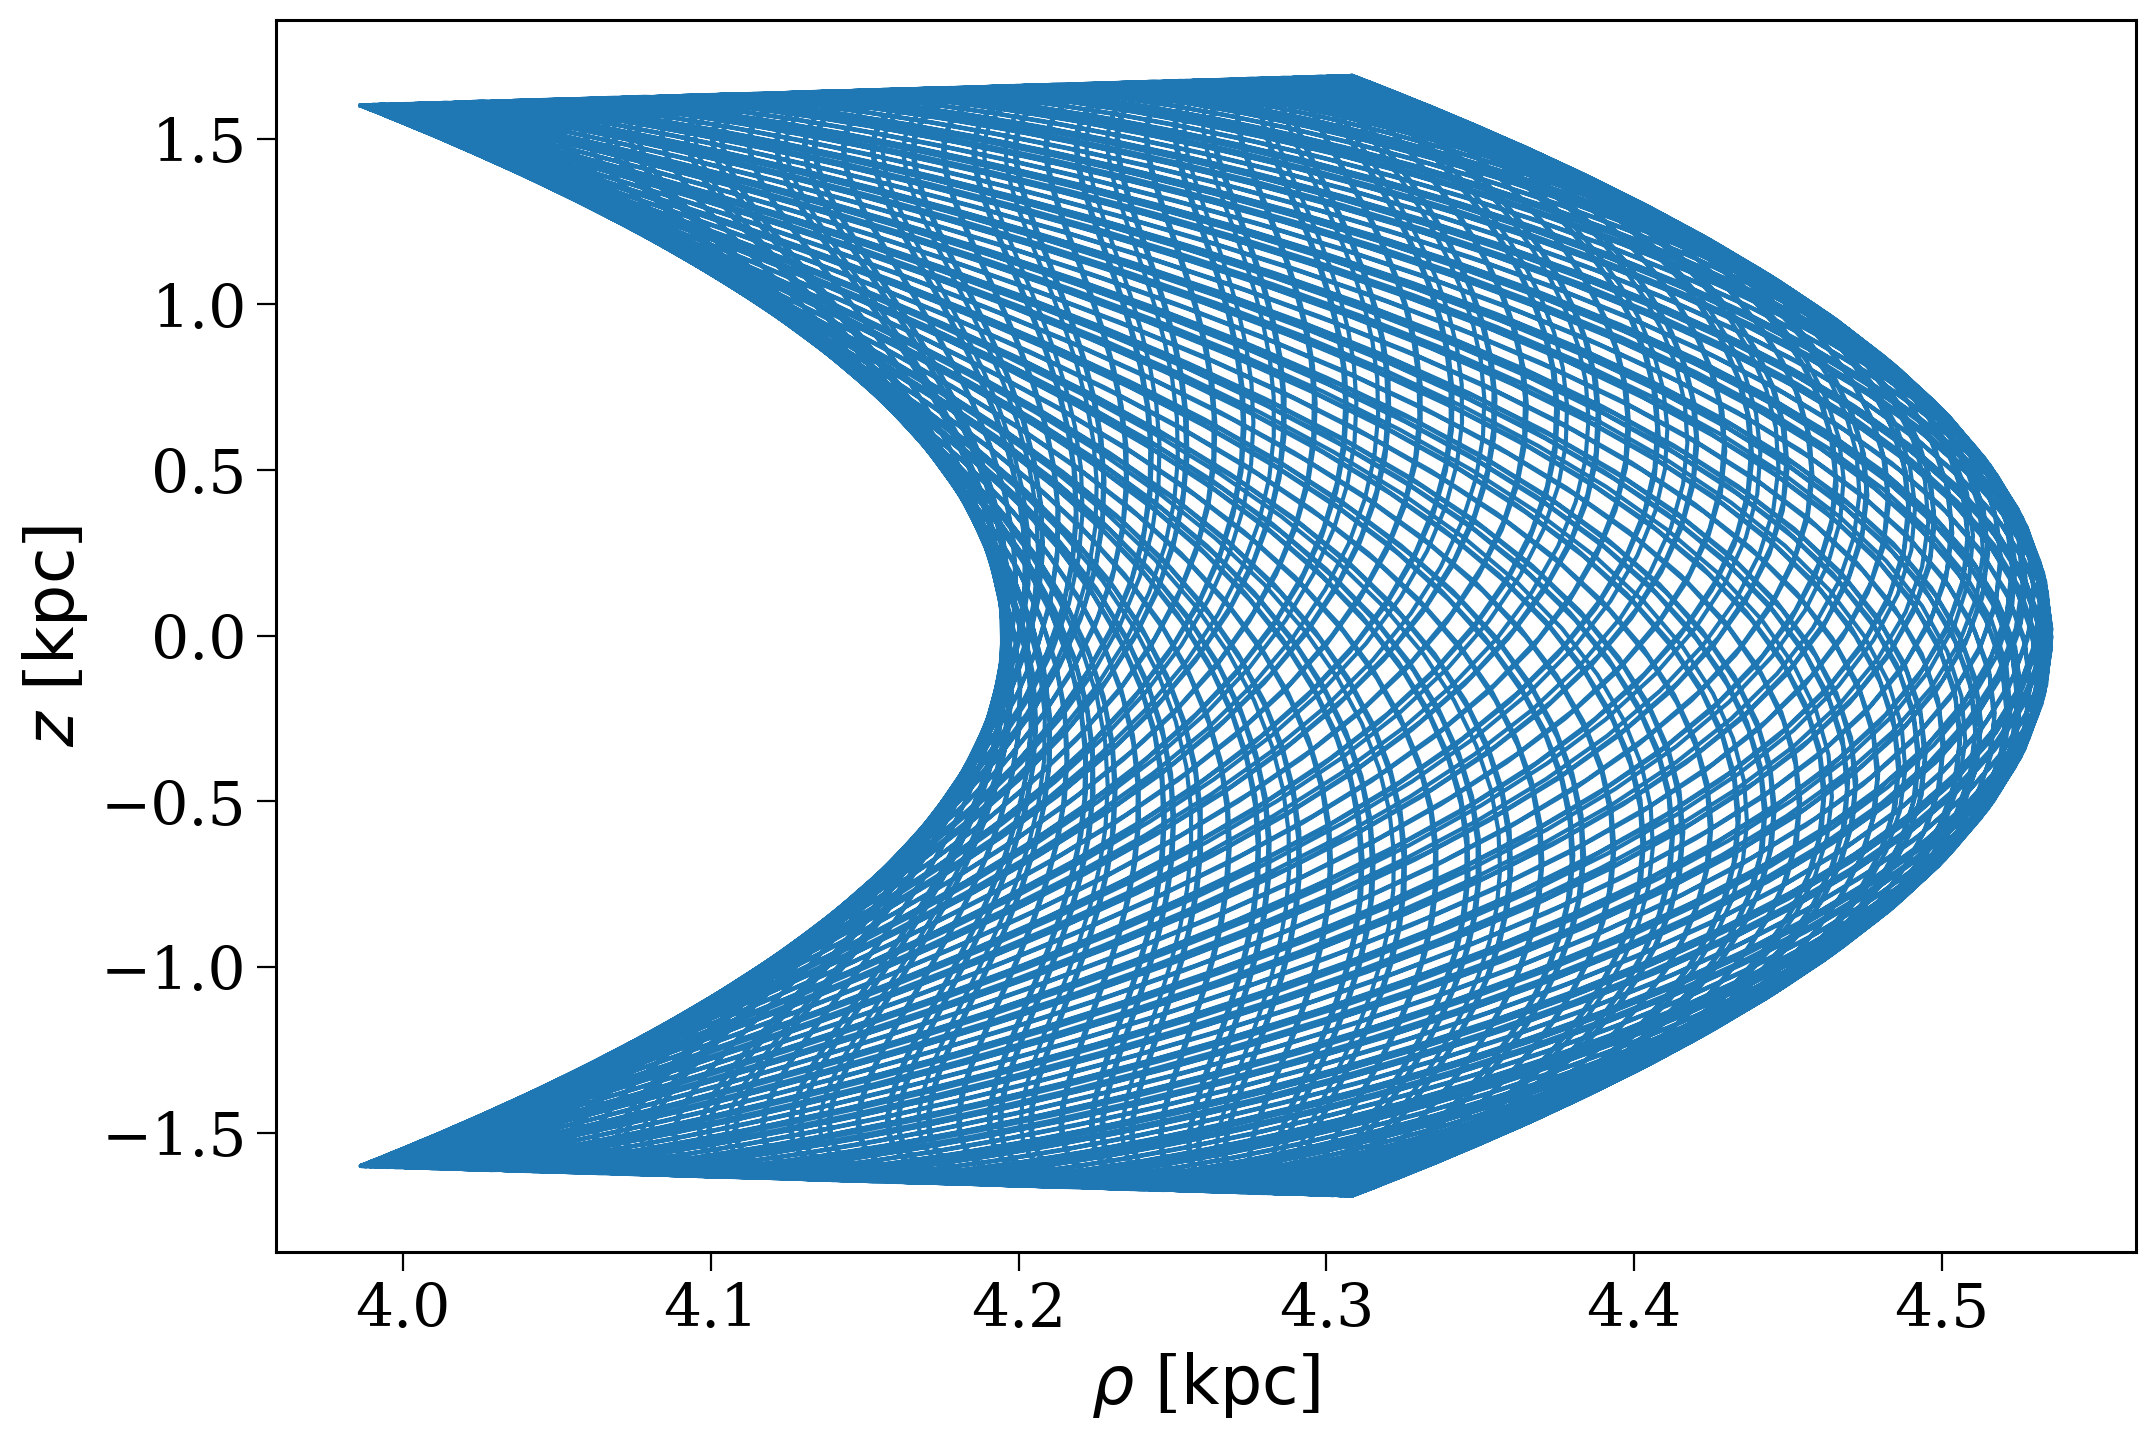

In [10]:
fig, ax = plt.subplots()
final_rho = np.sum(p.final_pos[:, :2]**2, axis=1)**(0.5)
nice_orbits = p.orbits[(final_rho > 4 * u.kpc) & (final_rho < 5 * u.kpc)]
nice_orbit = np.random.choice(nice_orbits)
nice_orbit.cylindrical.plot(["rho", "z"], axes=ax)
plt.show()

If this part interests you then I recommend that you go and check out the [excellent gala docs](http://gala.adrian.pw/en/latest/dynamics/orbits-in-detail.html) about orbits and what you can do with them.

Present Day
-----------

In many cases, you may not really care what happened over the history of the galaxy (way to let the past go!). In these cases you can instead only focus on the present day state of each binary.

For example, we could extract any binary that ended up disrupted

In [11]:
p.final_bpp[p.disrupted]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
79,6078.432825,1.242000,1.875230,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,6048.248363,6046.447190,1.000000e+10,1.000000e+10,1.242000,1.875230,0.000014,0.000014,1.897550,15.997268,6.321676e-10,8.336351e-10,7769.868183,8326.252869,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.154477e+07,2.963917e+06,1.581410e+11,1.149703e+12,0.0,0.0,0.0,0.0,30.184462,31.985635,0.0,0.0,79,0.020505
257,1817.289315,1.851997,1.786909,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1810.617910,1800.477681,1.000000e+10,1.000000e+10,1.851997,1.786909,0.000014,0.000014,5.308531,15.273532,9.219243e-09,9.102550e-09,15183.762887,15135.485649,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.144354e+07,9.125466e+06,1.394441e+12,1.751774e+12,0.0,0.0,0.0,0.0,6.671405,16.811634,0.0,0.0,257,0.021907
1053,3034.646582,1.880376,2.364322,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,3028.956596,3025.553412,1.000000e+10,1.000000e+10,1.880376,2.364322,0.000014,0.000014,5.421676,6.734794,3.328035e-09,3.888694e-09,11769.352501,12236.480844,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.821890e+06,5.764960e+06,2.678615e+12,1.776301e+12,0.0,0.0,0.0,0.0,5.689986,9.093169,0.0,0.0,1053,0.030000
1285,11117.339342,1.242000,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11061.477602,11056.885789,1.000000e+10,1.000000e+10,1.242000,1.277584,0.000014,0.000014,7.018361,8.768755,1.890015e-10,1.927725e-10,5745.421392,5773.868504,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.100059e+07,9.531526e+06,3.039036e+10,6.693072e+10,0.0,0.0,0.0,0.0,55.861740,60.453553,0.0,0.0,1285,0.004750
1322,10135.202307,1.341182,0.791059,13.0,11.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10114.596715,9431.159889,1.000000e+10,1.000000e+10,1.341182,0.791059,0.000014,0.010414,12.114272,0.791059,2.379850e-10,1.890661e-05,6086.154606,3746.340086,0.000014,0.010414,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.236665e+07,5.550202e-06,7.620192e+10,0.000000e+00,0.0,0.0,0.0,0.0,20.605593,704.042418,0.0,0.0,1322,0.006304
1522,4698.009159,1.368084,3.111406,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,4684.283038,4675.296607,1.000000e+10,1.000000e+10,1.368084,3.111406,0.000014,0.000013,3.967549,18.080531,1.124448e-09,1.000000e-10,8973.056439,5047.872444,0.000014,0.000013,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.775880e+06,2.000000e+08,1.546560e+12,0.000000e+00,0.0,0.0,0.0,0.0,13.726121,22.712552,0.0,0.0,1522,0.008633
1544,3996.169616,1.781386,8.239739,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,3985.716768,3980.350221,1.000000e+10,1.000000e+10,1.781386,8.239739,0.000014,0.000035,5.023196,24.952742,1.853639e-09,1.000000e-10,10167.445537,3101.915434,0.000014,0.000035,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.273290e+06,2.000000e+08,1.337615e+12,0.000000e+00,0.0,0.0,0.0,0.0,10.452848,15.819395,0.0,0.0,1544,0.007052
1797,8649.428575,2.163311,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,8637.558432,8628.717949,1.000000e+10,1.000000e+10,2.163311,1.277584,0.000014,0.000014,16.577057,11.547329,4.495497e-10,3.165325e-10,7135.099303,6535.971715,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.830290e+07,1.080830e+07,5.125065e+10,1.342781e+11,0.0,0.0,0.0,0.0,11.870143,20.710626,0.0,0.0,1797,0.013999
1849,10976.158027,1.609459,0.671046,13.0,11.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10959.260417,8123.459829,1.000000e+10,1.000000e+10,1.609459,0.671046,0.000014,0.011855,14.000312,0.671046,2.290567e-10,2.147350e-05,6028.251398,3624.947888,0.000014,0.011855,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.084272e+06,5.049565e-06,6.241234e+11,0.000000e+00,0.0,0

In [12]:
final_coords = p.get_final_mw_skycoord()

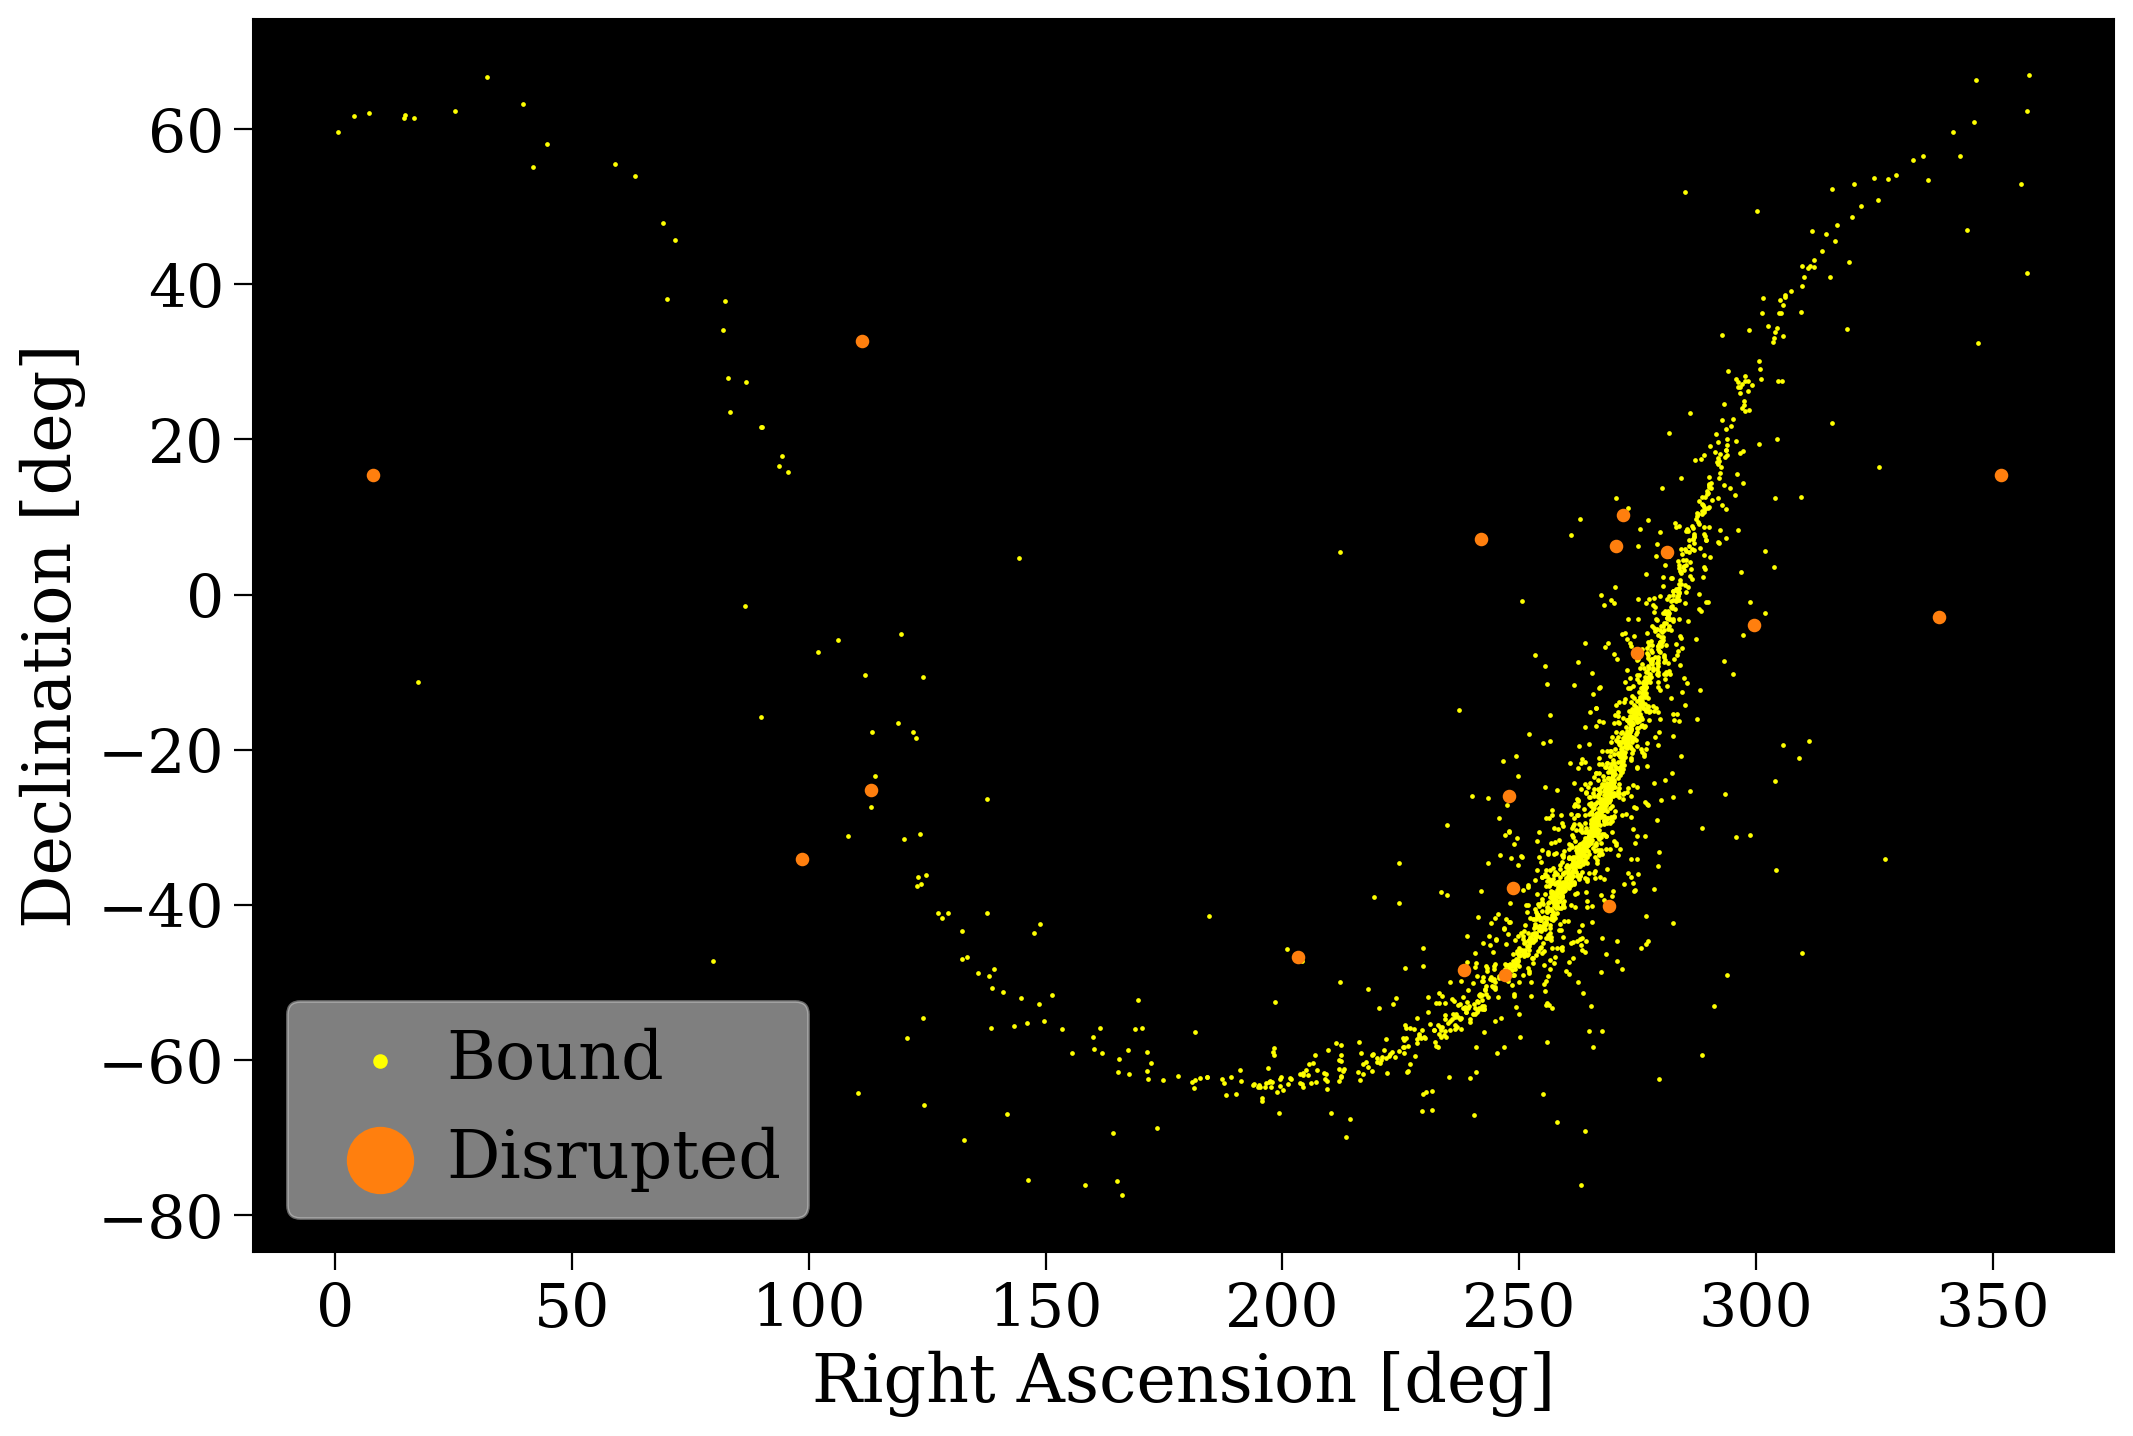

In [13]:
fig, ax = plt.subplots()
ax.scatter(final_coords[:len(p)][~p.disrupted].icrs.ra, final_coords[:len(p)][~p.disrupted].icrs.dec, s=0.5, c="yellow", label="Bound")
ax.scatter(final_coords[:len(p)][p.disrupted].icrs.ra, final_coords[:len(p)][p.disrupted].icrs.dec, s=15, c="C1")
ax.scatter(final_coords[len(p):].icrs.ra, final_coords[len(p):].icrs.dec, s=15, c="C1", label="Disrupted")
ax.set(xlabel="Right Ascension [deg]", ylabel="Declination [deg]", facecolor="black")
ax.legend(markerscale=6, handletextpad=.0, framealpha=0.5)
plt.show()

And we see that often (but not always) they are found off the galactic plane (due to the same supernova kick that disrupted binary)

# Classify population
The Population can also classify the present-day state of each binary. You can autogenerate these classes by accessing ``p.classes``

In [14]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This table has a flag for each class and for each binary. We can do some pandas DataFrame manipulation to get some statistics for the different classes

In [15]:
p.classes.astype(int).sum()

dco                     0
co-1                    9
co-2                    8
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             0
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             0
widow-1                 0
widow-2                 0
stellar-merger-co-1     6
stellar-merger-co-2    15
dtype: int64

# Predict observables
You can also use the Population class to predict what we might actually observe for this population in different filters. This uses dust maps to correct for extinction, applies bolometric corrections and blends the stars if necessary.

In [16]:
p.get_observables(assume_mw_galactocentric=True, filters=["G", "BP", "RP"])

,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,G_app_1,G_app_2,teff_obs,log_g_obs,secondary_brighter,G_abs_1,G_abs_2,BP_app_1,BP_app_2,BP_abs_1,BP_abs_2,RP_app_1,RP_app_2,RP_abs_1,RP_abs_2
0,3.135,6.0,9.962417,24.805736,10.053512,24.896831,27.395107,inf,3465.755631,4.997030,False,10.008185,inf,29.621684,inf,11.181330,inf,26.119833,inf,8.972287,inf
1,6.000,6.0,11.370082,25.562902,11.527721,25.720541,29.546063,inf,3075.931406,5.113452,False,11.901738,inf,33.466358,inf,13.708308,inf,28.133197,inf,10.694608,inf
2,6.000,6.0,10.813215,24.660544,12.030537,25.877866,29.058230,inf,3135.121577,5.030076,False,11.766886,inf,33.006444,inf,13.558090,inf,27.642826,inf,10.560757,inf
3,6.000,6.0,10.135161,24.940522,10.489958,25.295319,28.883461,inf,3369.333561,4.996419,False,10.462564,inf,32.250529,inf,11.822865,inf,27.498014,inf,9.363970,inf
4,6.000,6.0,12.989307,29.454242,13.057367,29.522303,inf,inf,2224.737490,4.983729,False,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,6.000,6.0,16.870641,32.239812,16.941633,32.310804,35.878808,inf,5181.486117,9.180749,False,16.416702,inf,38.221992,inf,17.010481,inf,34.580160,inf,15.680207,inf
2031,4.158,6.0,9.430255,24.852409,9.544657,24.966811,27.812446,inf,3778.797041,4.993400,False,9.184470,inf,29.966161,inf,10.071479,inf,26.547310,inf,8.284929,inf
2032,6.000,6.0,8.718292,22.952754,11.617981,25.852443,27.331673,inf,3669.322023,4.865576,False,9.331177,inf,30.296101,inf,10.402617,inf,25.973133,inf,8.334820,inf
2033,4.554,6.0,9.301391,22.548966,10.423108,23.670684,25.993105,inf,3597.564178,4.941795,False,9.701069,inf,28.545650,inf,10.835435,inf,24.676001,inf,8.679275,inf


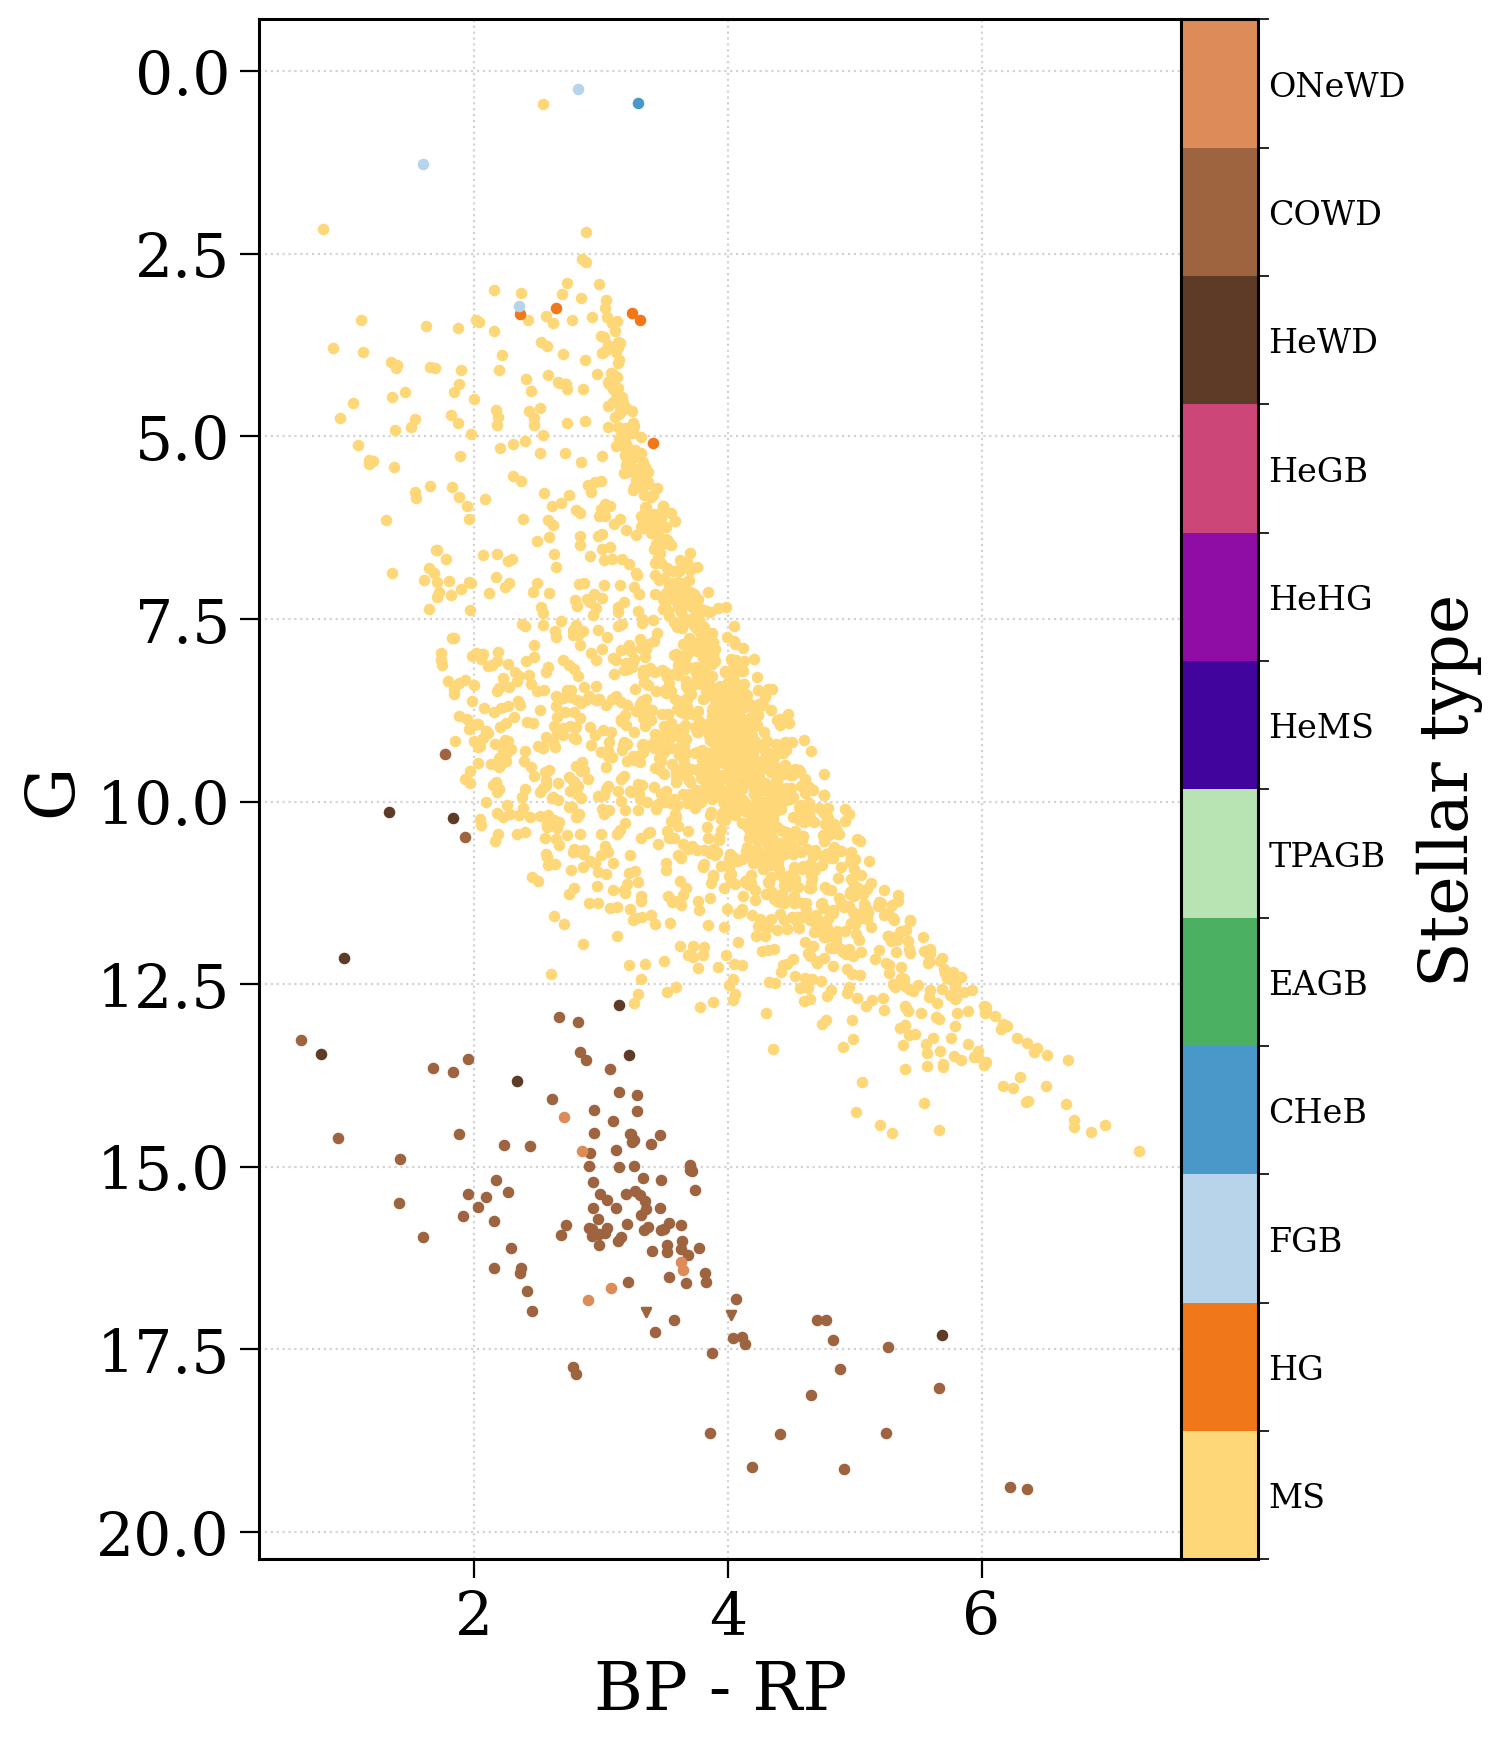

(<Figure size 700x1000 with 2 Axes>, <Axes: xlabel='BP - RP', ylabel='G'>)

In [17]:
cogsworth.plot.plot_cmd(p, "G", "BP", "RP")

# Inspect specific binaries

``cogsworth`` has simple plotting routines to understand the evolution of binaries in your population. Here's an example for a binary that experiences a disruption.

These plots show the galactic orbit of the binary (indicating supernova events and different orbits for the primary and secondary after the disruption) and a cartoon timeline of its evolution.

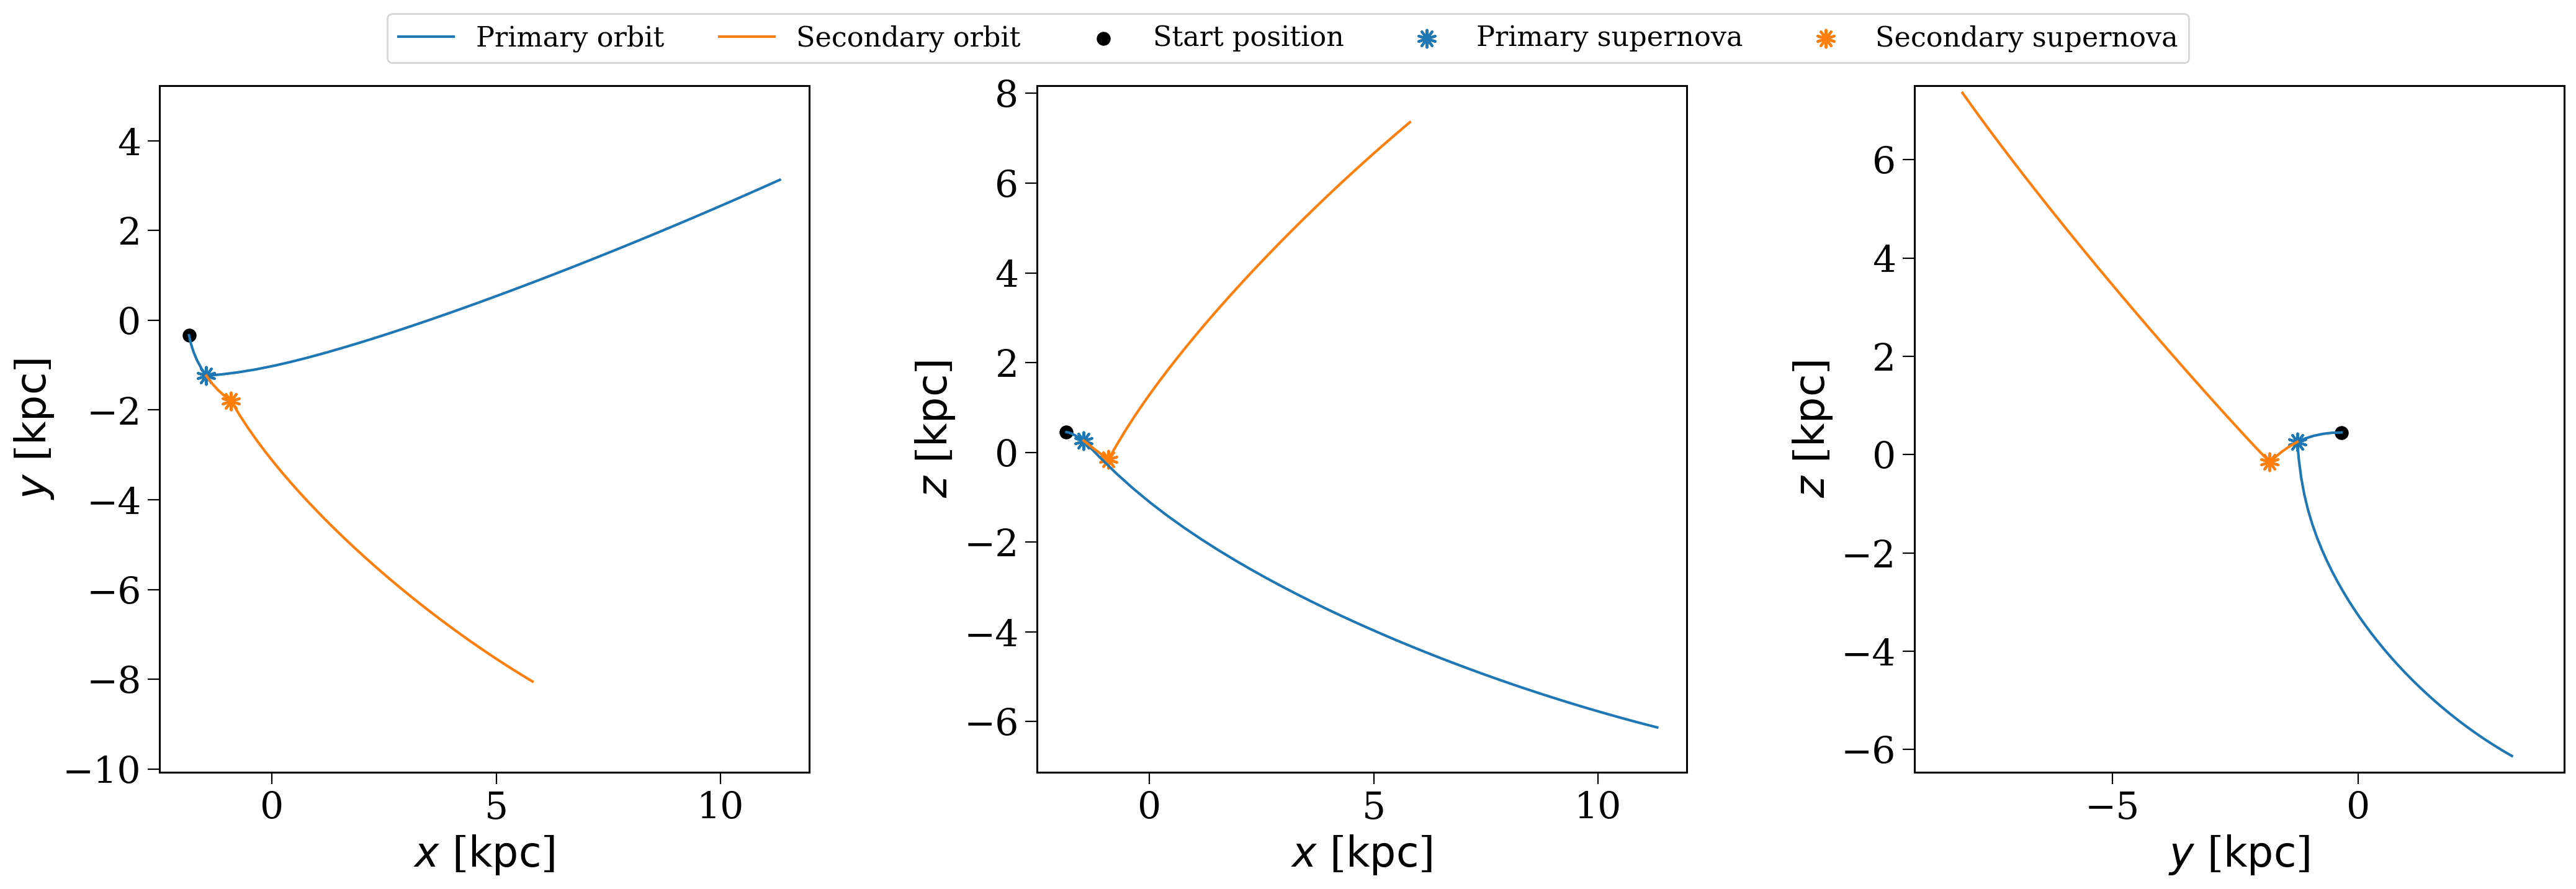

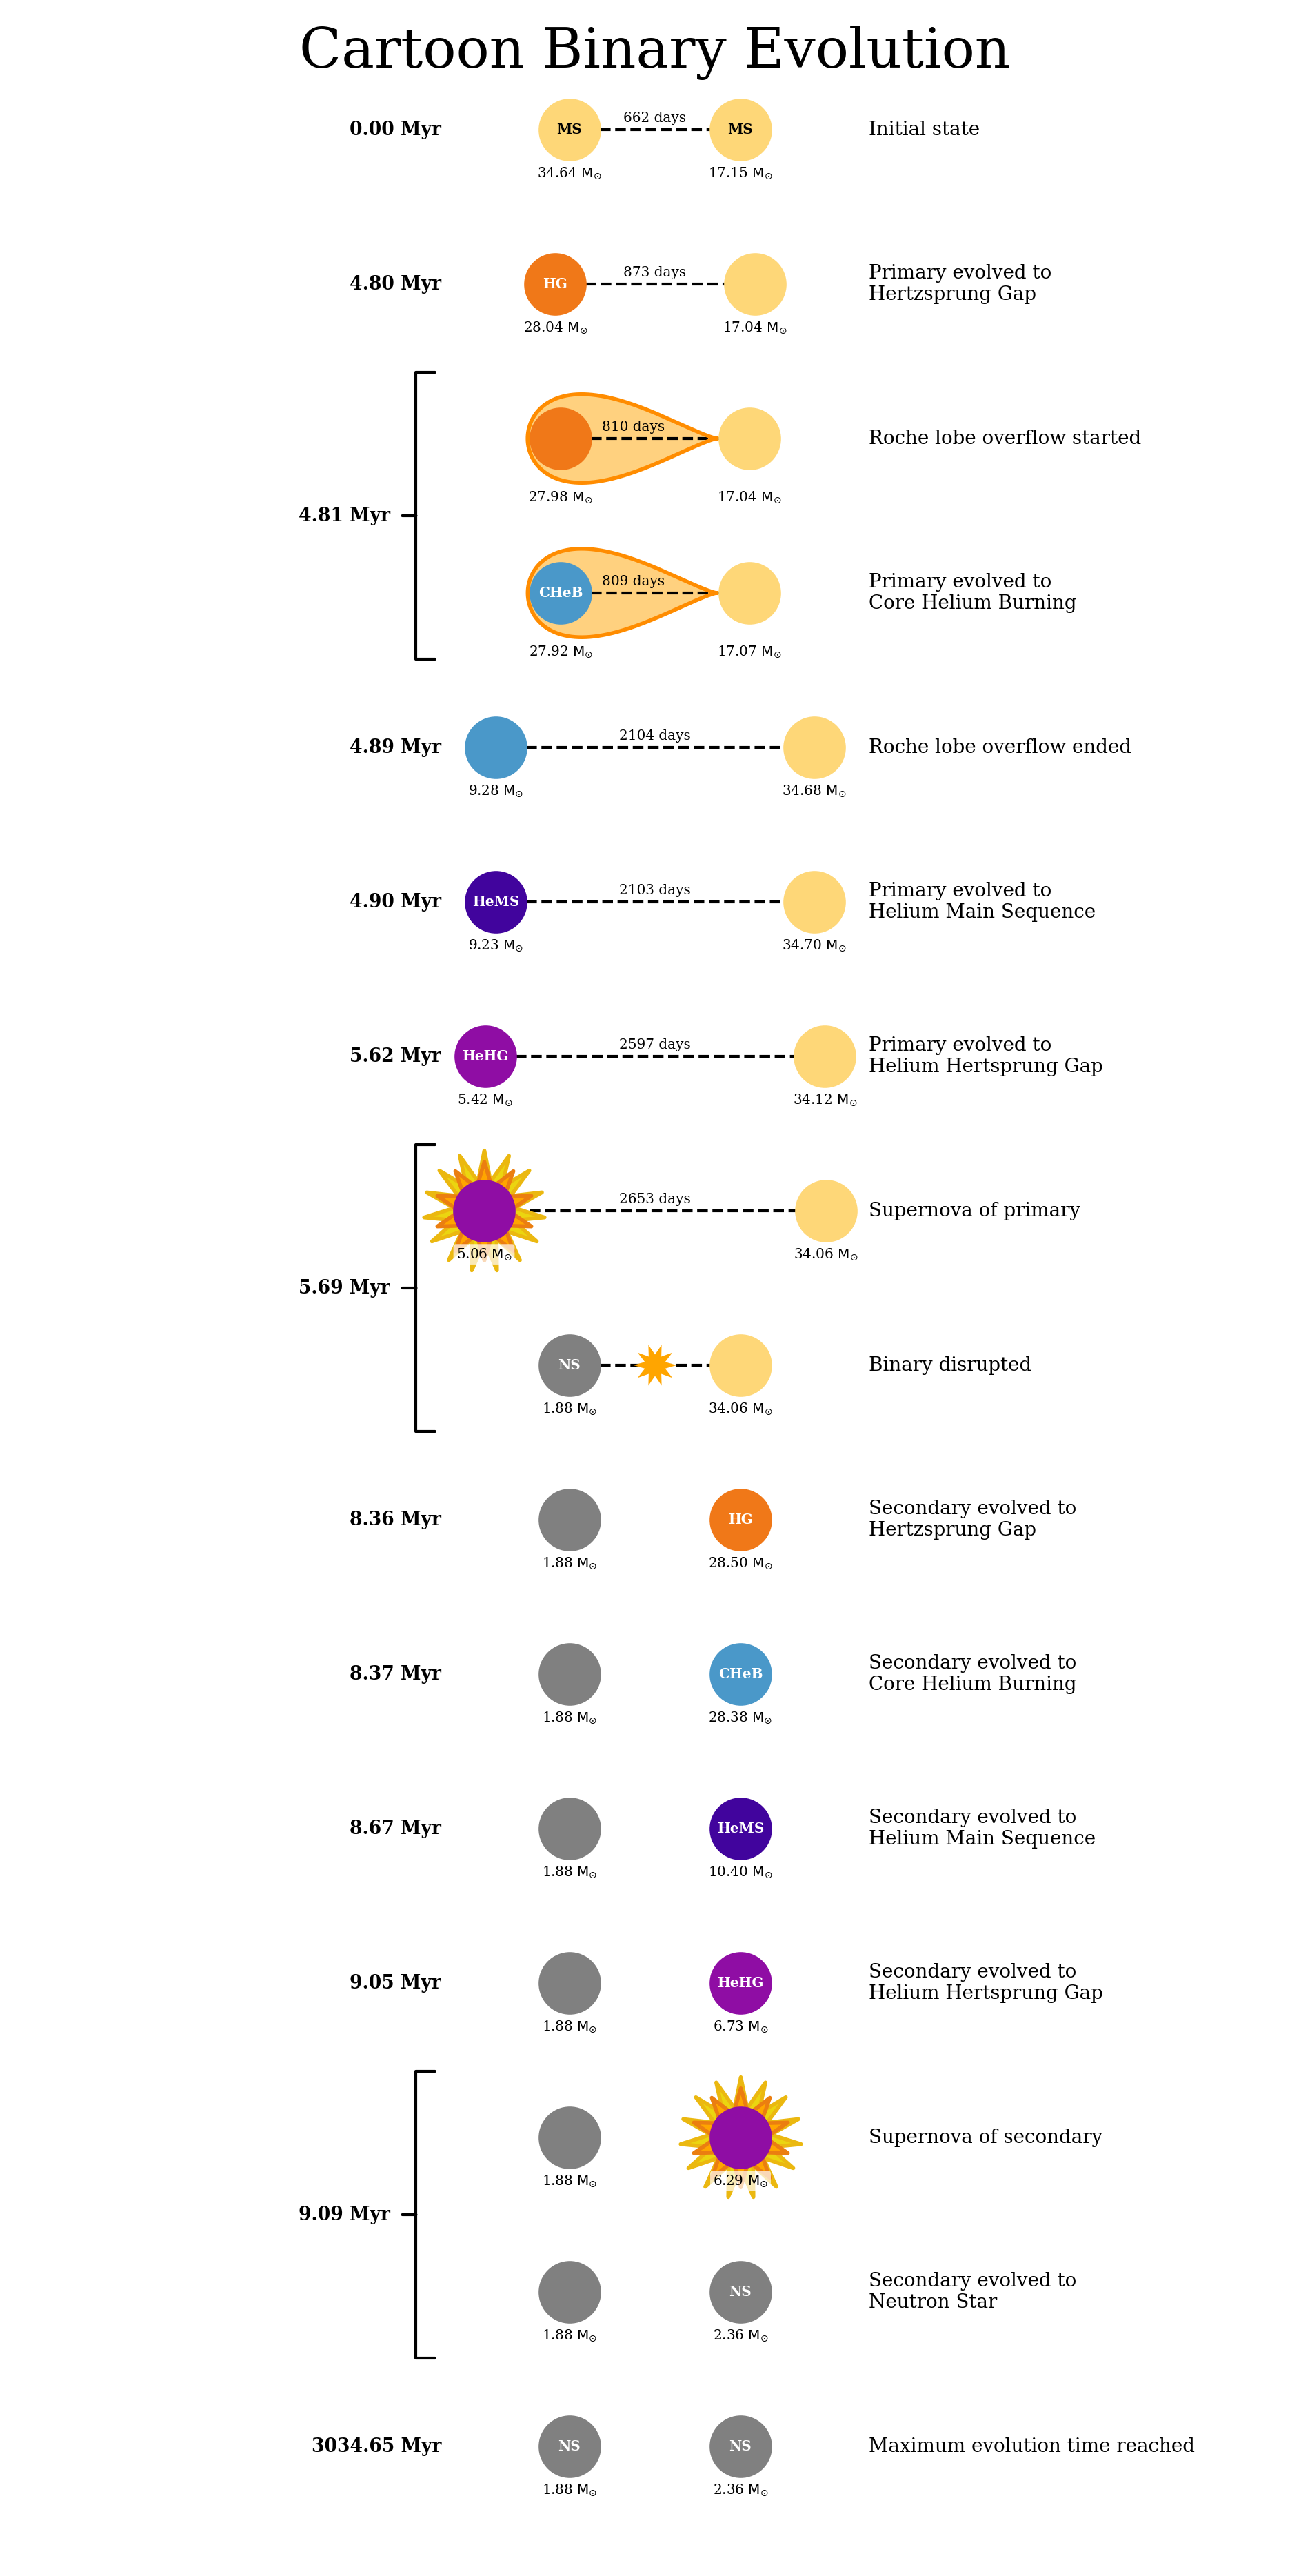

(<Figure size 1200x2400 with 1 Axes>, <Axes: >)

In [18]:
random_num = np.random.choice(p.bin_nums[p.disrupted])
p.plot_orbit(random_num, t_max=50 * u.Myr)
p.plot_cartoon_binary(random_num)

# And more...!

That's it for your quickstart introduction to ``cogsworth`` but that's only the beginning of what you can do with it! You can also learn how to use **hydrodynamical zoom-in simulations** or predict the **gravitational-wave signal in LISA** for your binaries. I've got pages of documentation ready for you to learn all of about it.


If you're interested in learning more you've got a couple of options - you could:

- Check out [the other tutorials](https://cogsworth.readthedocs.io/en/latest/pages/tutorials.html) for more step-by-step guides of using ``cogsworth``
- Browse the [gallery of examples](https://cogsworth.readthedocs.io/en/latest/auto_examples/index.html) to see how you could put ``cogsworth`` to use
- Search through the [user guide](https://cogsworth.readthedocs.io/en/latest/pages/modules.html) if you want to know how a specific class or function works

Hope you enjoy using ``cogsworth``!